# Étude de la potabilité de l'eau

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



## Analyse exploratoire des données

Le dataset contient 9 mesures de la qualité de l'eau pour 3276 étendues d'eau différentes : 
- ph -> mesure l'acidité ou l'alcalinité de l'eau
- Hardness -> due principalement à la présence de calcium et magnésium
- Solids -> mesure la quantité totale de minéraux dissous
- Chloramines -> sous-produits de la chloration avec de l'ammoniaque 
- Sulfate -> présents naturellement dans les eaux souterraines et minérales 
- Conductivity -> indique la capacité de l'eau à conduire un courant électrique 
- Organic_carbon -> quantité de carbonne issu de composés organiques dans l'eau 
- Trihalomethanes -> composés formés lors de la chloration de l'eau contenant de la matière organique
- Turbidity -> mesure des particules en suspension qui diffusent la lumière
- Potability -> cible : indicateur binaire : 1, 0 = non potable


### Informations principales du dataset

#### Affichage des 5 premières lignes

In [66]:
df = pd.read_csv('data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Types de données

In [67]:
print("Types de colonnes :")
print(df.dtypes)

Types de colonnes :
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


#### Valeurs manquantes

In [68]:
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

print("\nPourcentage de valeurs nulles :")
print((df.isnull().sum() / len(df)) * 100)



Valeurs manquantes par colonne :
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Pourcentage de valeurs nulles :
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


Nous pouvons observer que nous avons des données manquantes dans le dataset (ph, sulfate et trihalomethanes) nous allons les traiter plus tard.

#### Visualisation des données manquantes

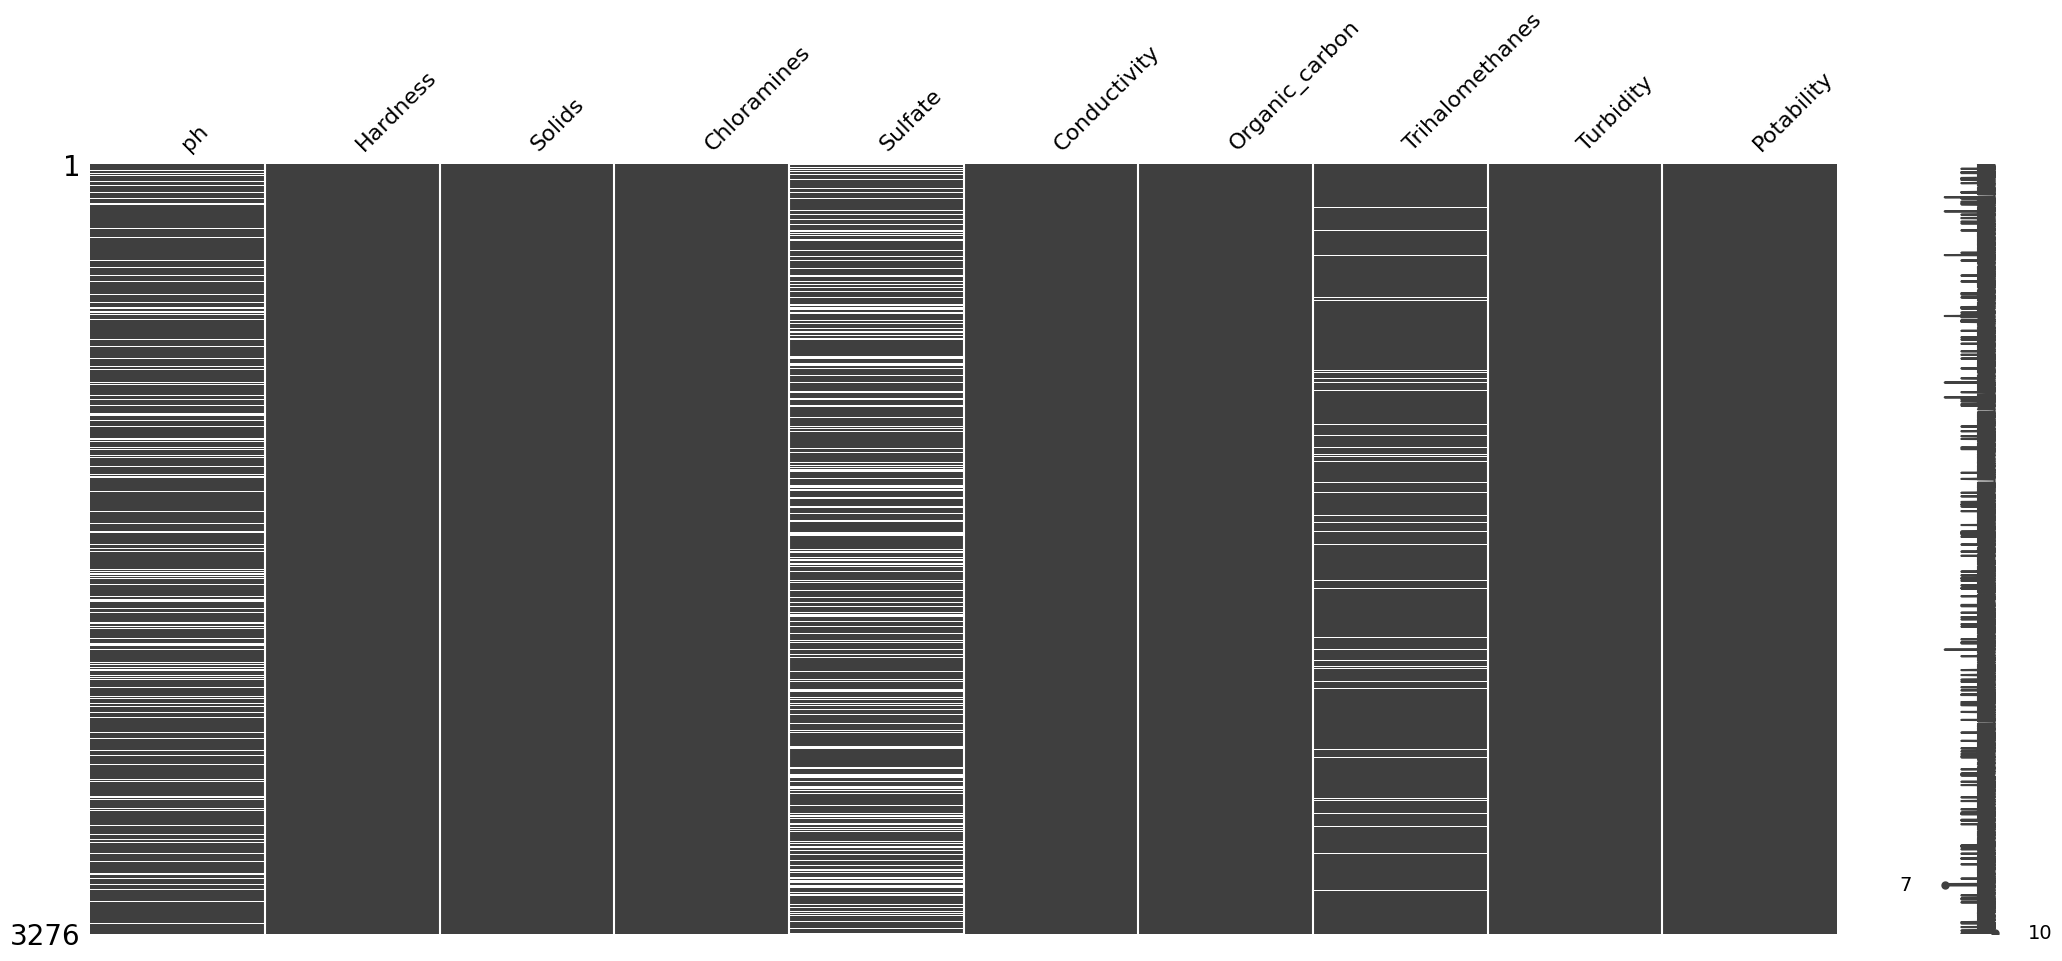

In [69]:
msno.matrix(df)
plt.show()

#### Statistiques descriptives

In [70]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Analyse des distributions

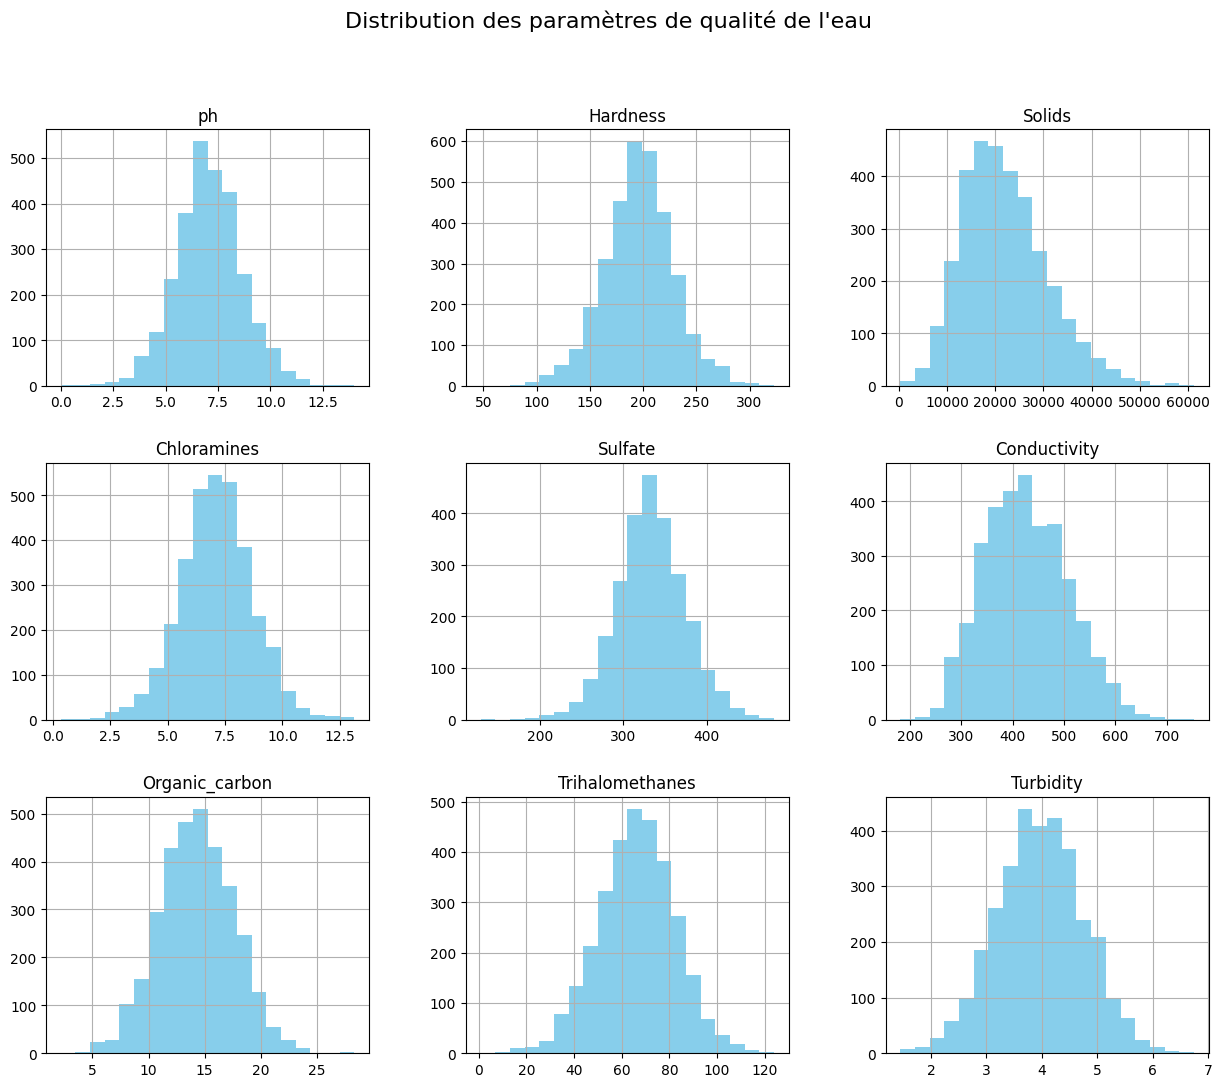

In [71]:
df_feature = df.drop(columns=['Potability'])
df_feature.hist(bins=20, figsize=(15, 12), color='skyblue')
plt.suptitle("Distribution des paramètres de qualité de l'eau", fontsize=16)
plt.show()

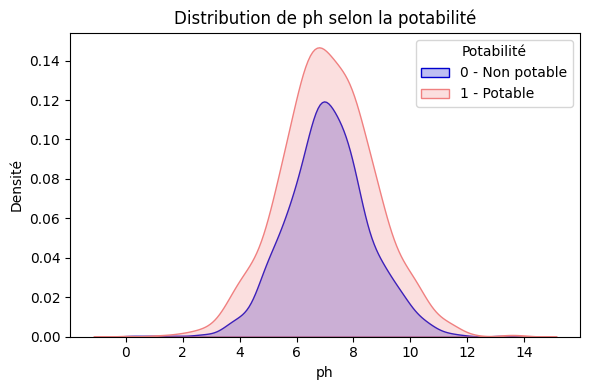

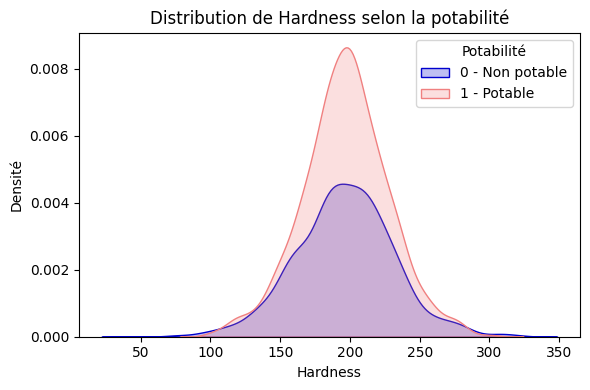

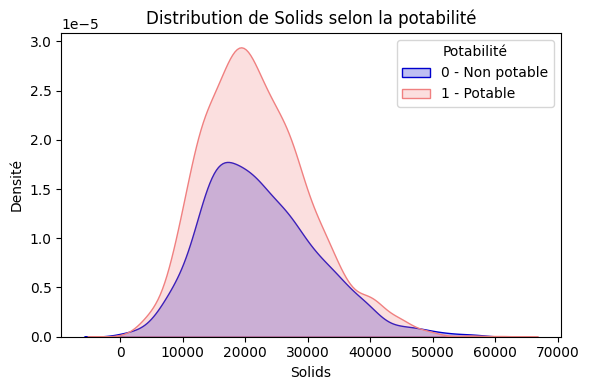

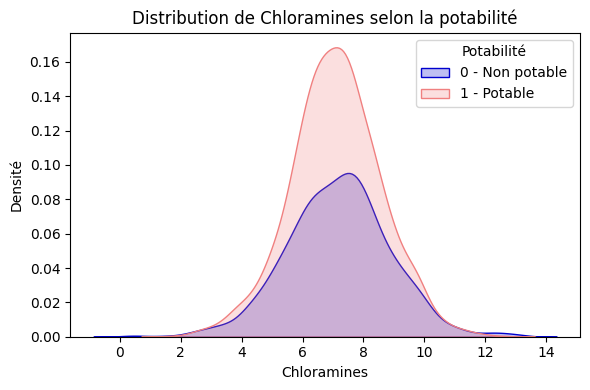

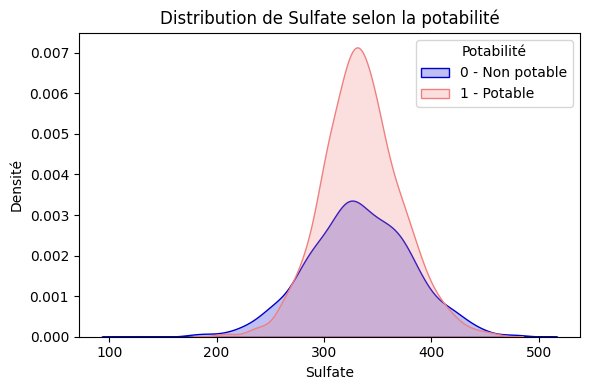

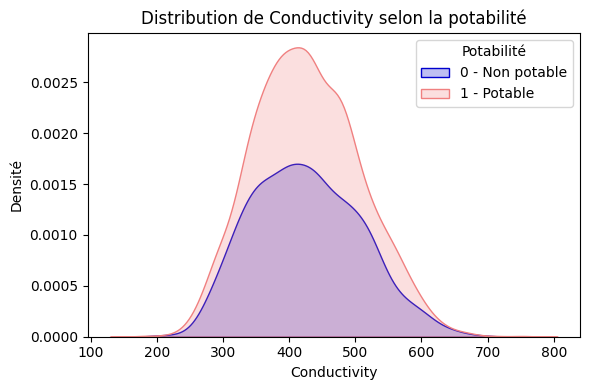

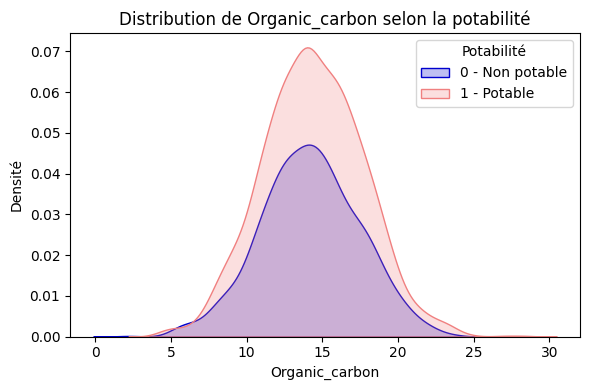

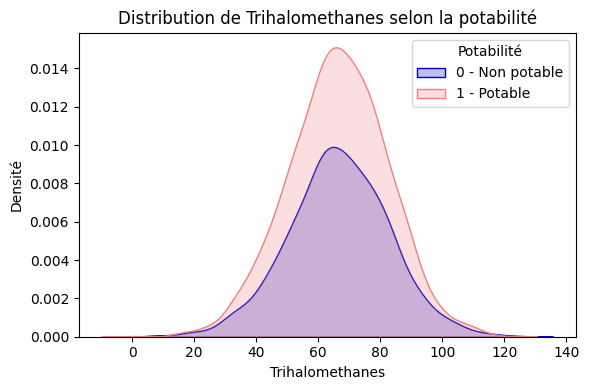

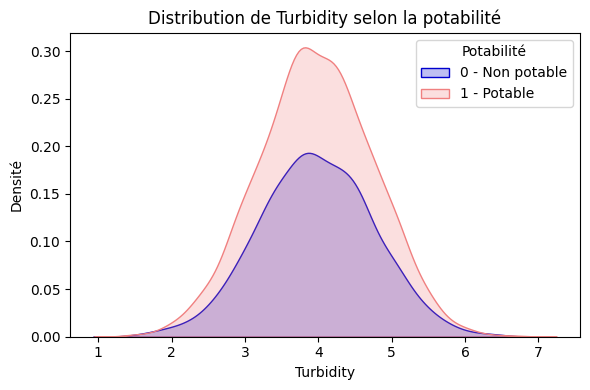

In [72]:
palette = {0: "lightcoral", 1: "mediumblue"}

for col in df_feature.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue="Potability", fill=True, palette=palette)
    plt.title(f"Distribution de {col} selon la potabilité")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.legend(title="Potabilité", labels=["0 - Non potable", "1 - Potable"])
    plt.tight_layout()
    plt.show()

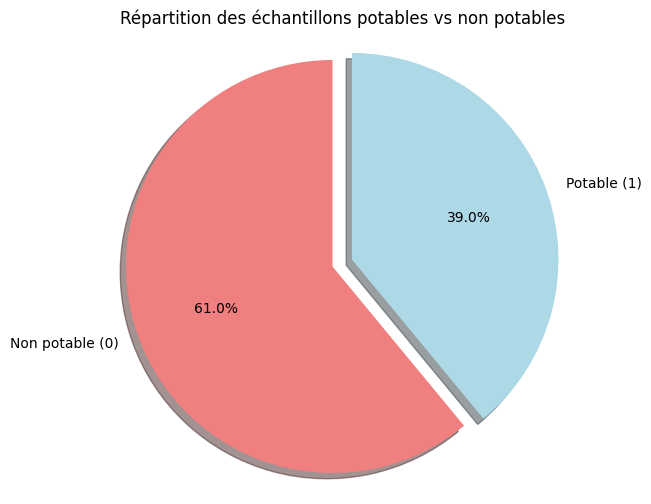

In [73]:
potability_counts = df['Potability'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    potability_counts,
    labels=["Non potable (0)", "Potable (1)"],
    autopct="%1.1f%%",
    colors=["lightcoral", "lightblue"],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)
plt.title("Répartition des échantillons potables vs non potables")
plt.axis("equal") 
plt.show()

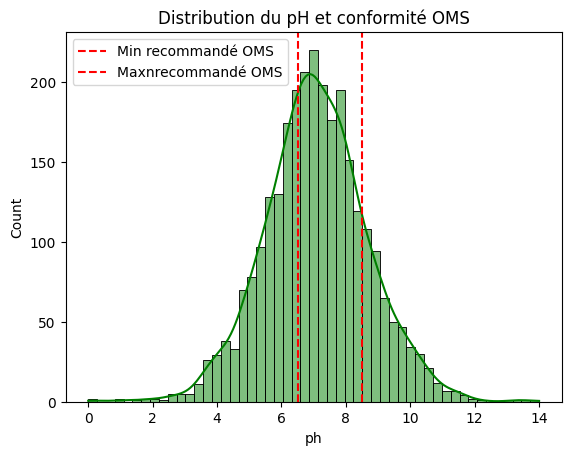

In [74]:
sns.histplot(df["ph"], kde=True, color="green")
plt.axvline(6.5, color='red', linestyle='--', label='Min recommandé OMS')
plt.axvline(8.5, color='red', linestyle='--', label='Maxnrecommandé OMS')
plt.title("Distribution du pH et conformité OMS")
plt.legend()
plt.show()


### Corrélations

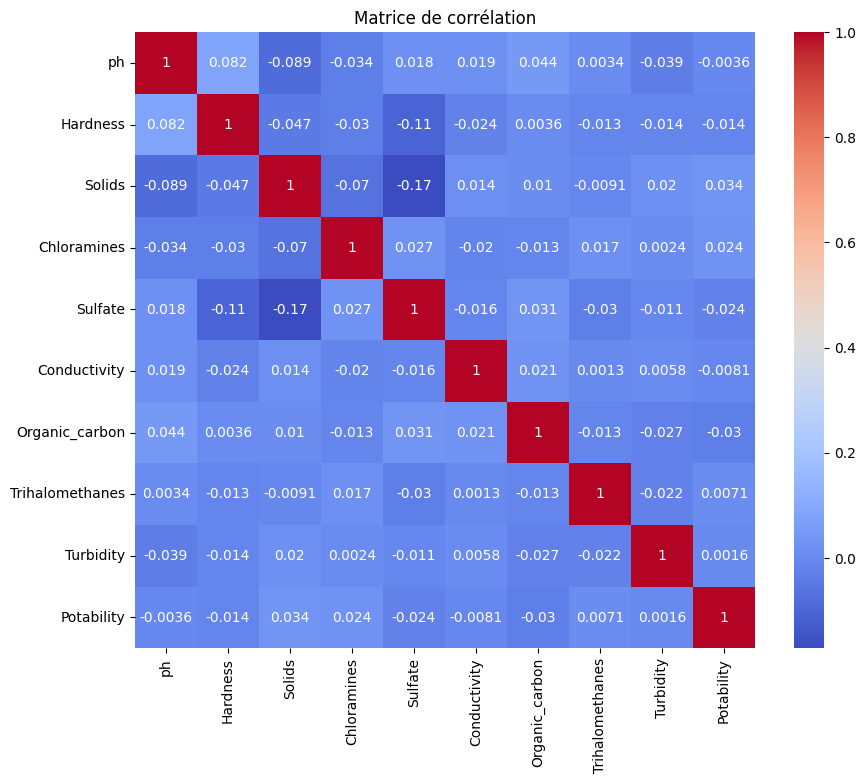

In [75]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


### Outliers

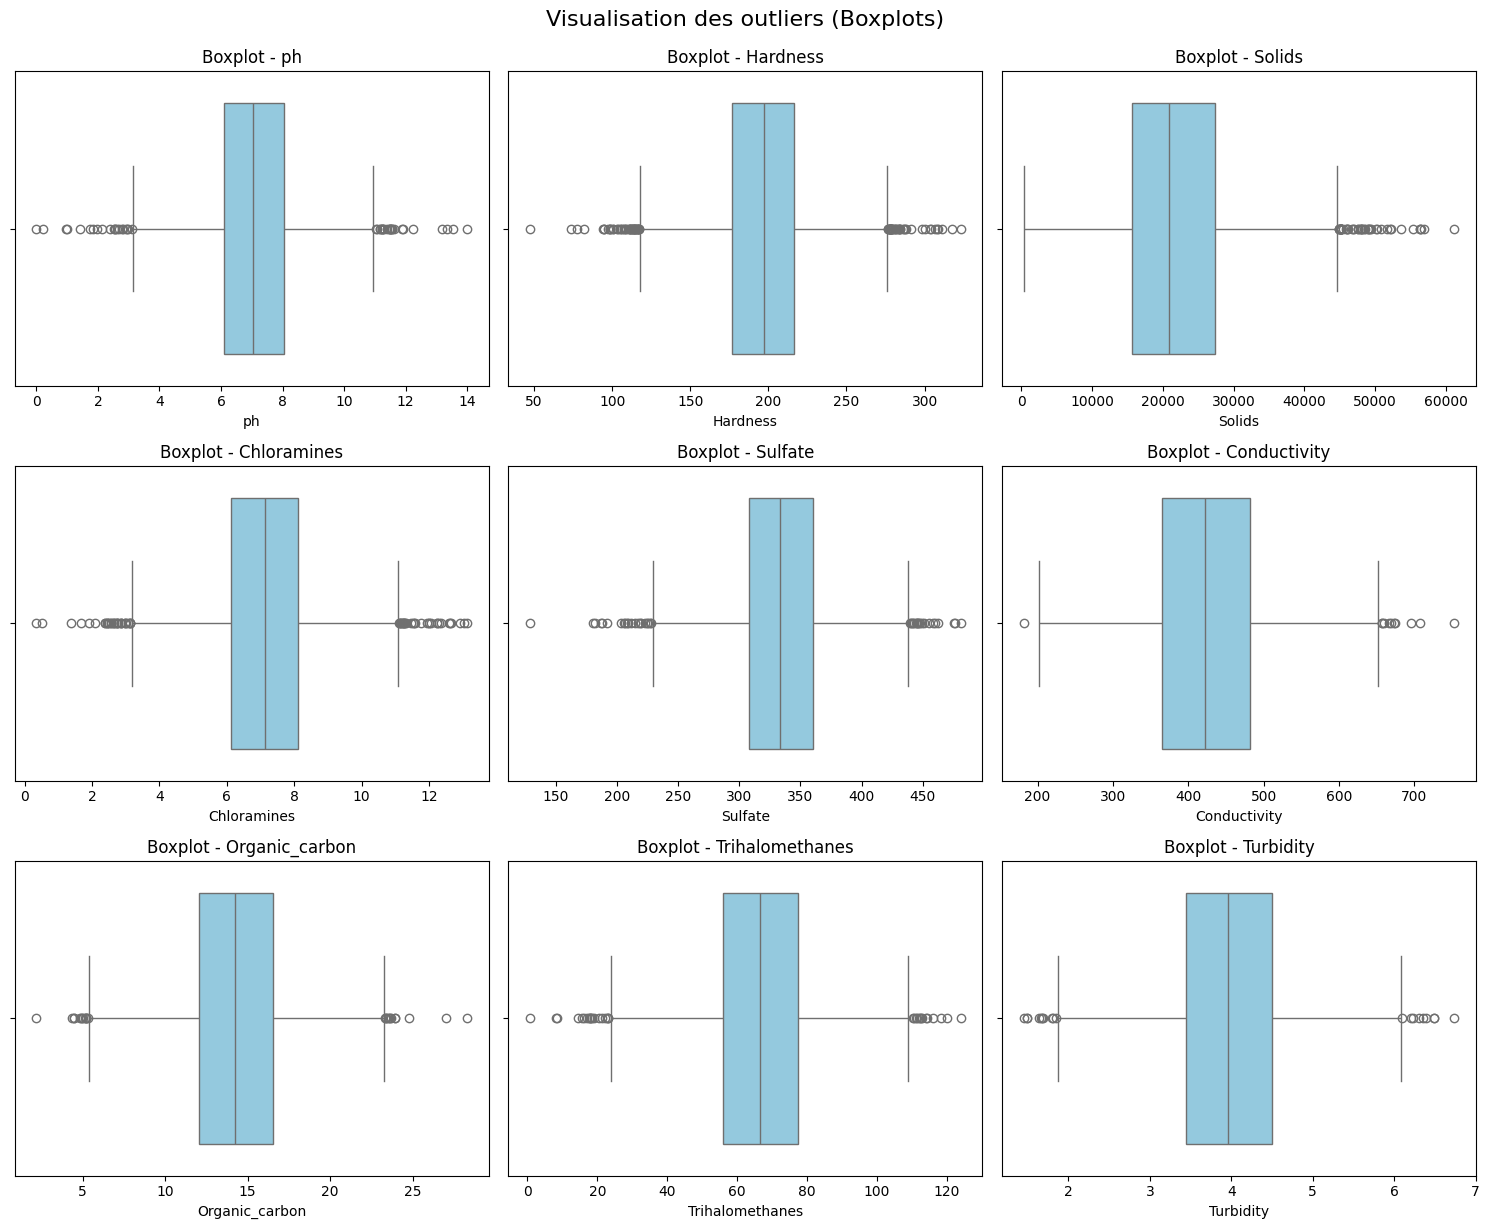

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 12))
for i, col in enumerate(df_feature.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
plt.suptitle("Visualisation des outliers (Boxplots)", fontsize=16, y=1.02)
plt.show()


In [77]:
def detect_outliers_iqr(df, exclude=["Potability"]):

    outlier_indices = {}

    for col in df.columns:
        if col in exclude:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()

        print(f"{col} : {len(outliers)} outliers détectés")

    return outlier_indices


In [78]:
outliers = detect_outliers_iqr(df)

ph : 46 outliers détectés
Hardness : 83 outliers détectés
Solids : 47 outliers détectés
Chloramines : 61 outliers détectés
Sulfate : 41 outliers détectés
Conductivity : 11 outliers détectés
Organic_carbon : 25 outliers détectés
Trihalomethanes : 33 outliers détectés
Turbidity : 19 outliers détectés


In [79]:
all_outliers = set(sum(outliers.values(), []))

df_clean = df.drop(index=all_outliers).reset_index(drop=True)

print(f"Lignes supprimées : {len(all_outliers)}")
print(f"Nouveau shape : {df_feature.shape}")


Lignes supprimées : 325
Nouveau shape : (3276, 9)


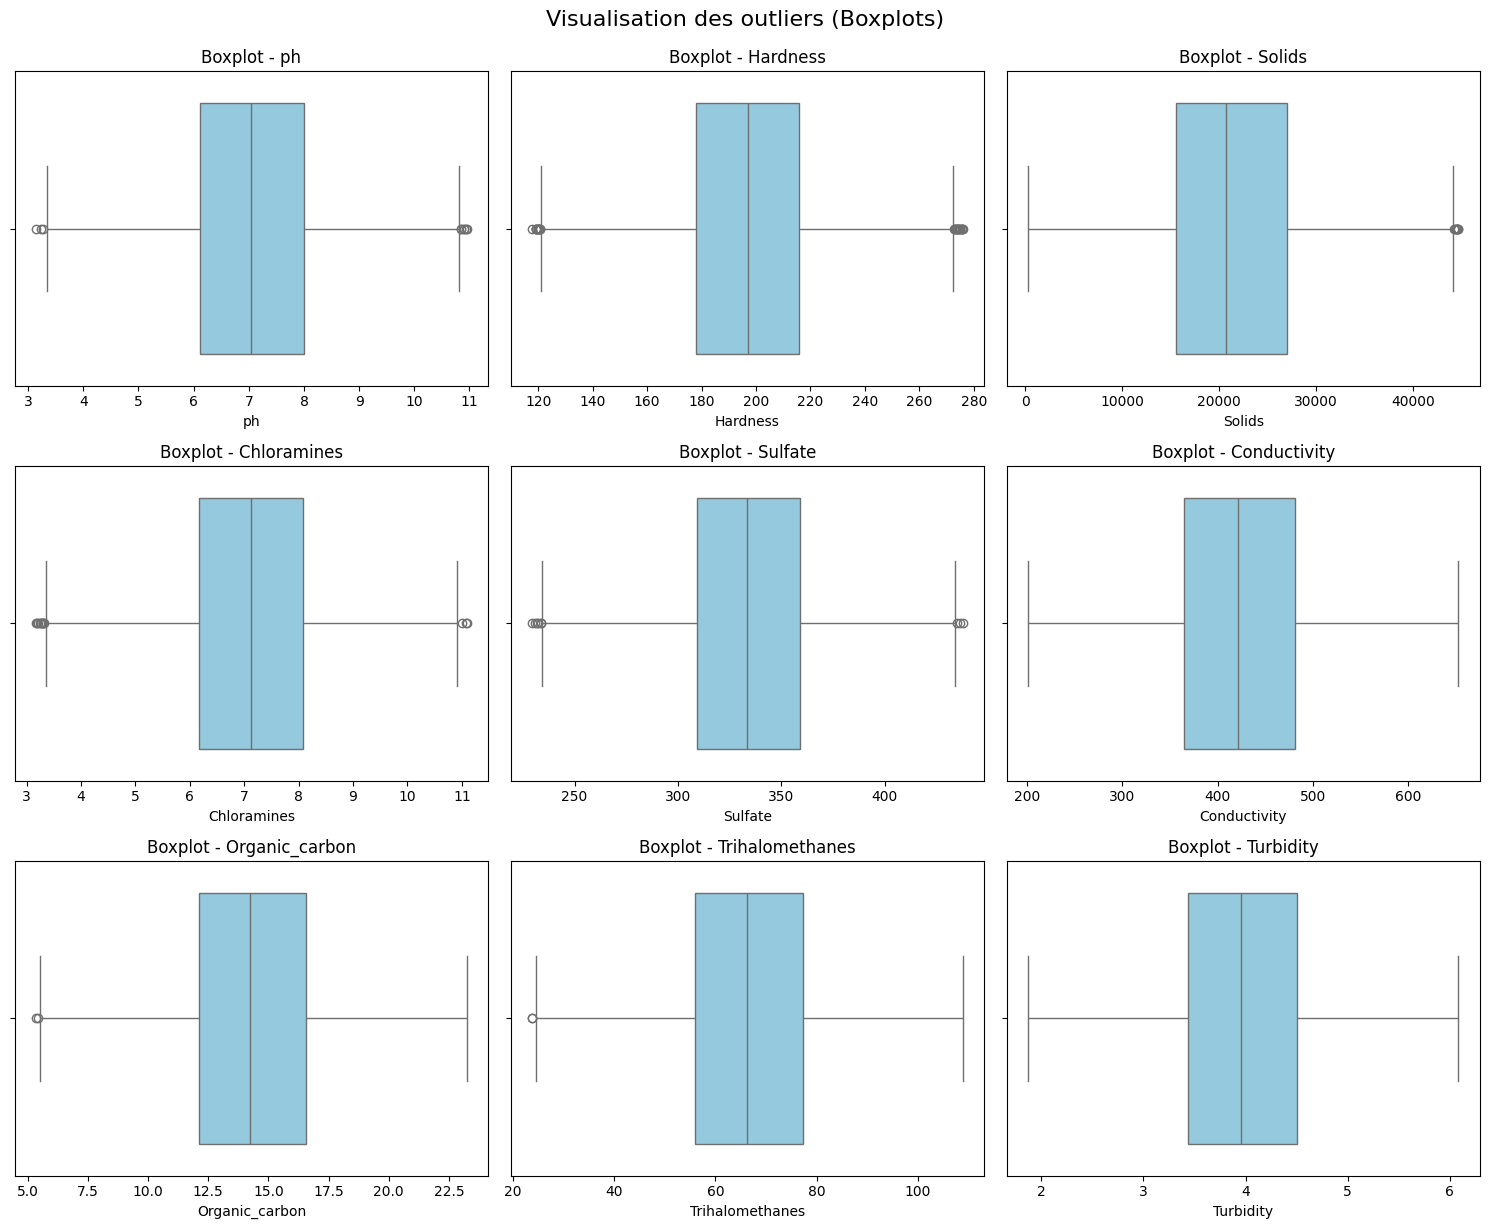

In [88]:
df_feature_clean = df_clean.drop(columns=['Potability'])
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_feature_clean.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_clean[col], color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
plt.suptitle("Visualisation des outliers (Boxplots)", fontsize=16, y=1.02)
plt.show()

### PCA

### Transformation des valeurs manquantes

Les variables 'ph', 'Sulfate' et 'Trihalomethanes' contiennent des valeurs manquantes.
Pour ph et Trihalomethanes, nous utilisons la moyenne par classe de potabilité (0 ou 1), car leurs distributions sont symétriques.
Pour Sulfate, dont la distribution est légèrement biaisée, nous utilisons la médiane par classe, plus robuste aux valeurs extrêmes.

In [89]:
df_clean["ph"] = df_clean.groupby("Potability")["ph"].transform(lambda x: x.fillna(x.mean()))
df_clean["Trihalomethanes"] = df_clean.groupby("Potability")["Trihalomethanes"].transform(lambda x: x.fillna(x.mean()))
df_clean["Sulfate"] = df_clean.groupby("Potability")["Sulfate"].transform(lambda x: x.fillna(x.median()))


#### Standardisation des données

In [91]:
X = df_clean.drop(columns="Potability")
y = df_clean["Potability"]

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


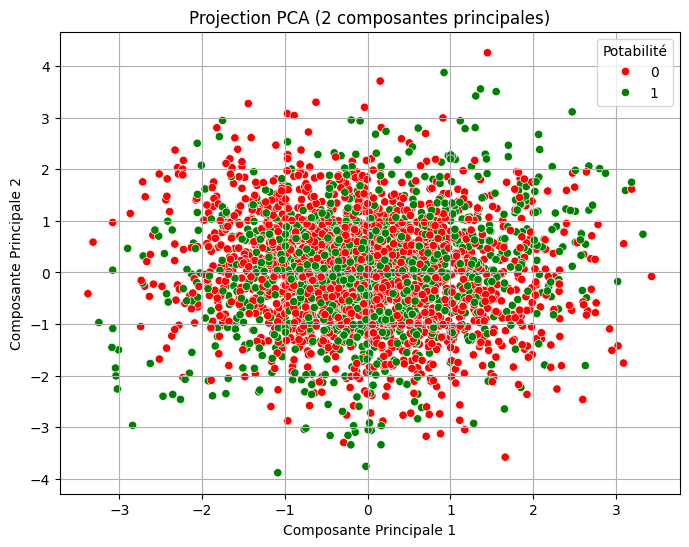

In [93]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Potability"] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Potability", palette=["red", "green"])
plt.title("Projection PCA (2 composantes principales)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.legend(title="Potabilité")
plt.grid(True)
plt.show()


On peut observer que les classes ne sont pas clairement séparables, on peut donc visualiser la difficulté de la tâche.


In [85]:
print("Variance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)
print(f"Variance totale expliquée : {pca.explained_variance_ratio_.sum():.2%}")


Variance expliquée par chaque composante :
[0.13338162 0.12630633]
Variance totale expliquée : 25.97%


On peut confirmer que la projection en 2D ne capture qu'une partie limitée de l'information globale, nous allons donc exploiter l'ensemble des variables d'origine, via un modèle non linéaire comme XGBoost.